In [1]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.optimize import fsolve
from tbcontrol.symbolic import routh
import pandas as pd

In [2]:
def sympyFunction(tf):
    num, den = ctl.tfdata(tf)
    s = sp.var('s')
    num_expr = sum(coef*s**i for i, coef in enumerate(num[0][0][::-1]))
    den_expr = sum(coef*s**i for i, coef in enumerate(den[0][0][::-1]))
    sympy_system = num_expr/den_expr
    return sympy_system

def roundSympyFunction(expr, num_digits=10):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(sp.Float)})

# PROJETANDO O CONTROLADOR
- Simulando a resposta desejada de segunda ordem e criando uma função de transferência $C$ em cima disso

In [3]:
Ts = 0.50
UP = 0.10

In [4]:
zeta = -np.log(UP)/np.sqrt(np.pi**2 + np.log(UP)**2)
Wn = 4/(zeta*Ts)

s = ctl.TransferFunction.s
T = np.linspace(0, Ts*3, 1000)

C = Wn**2/(s**2 + 2*zeta*Wn*s + Wn**2)
print(sympyFunction(C))
C

183.137461435056/(1.0*s**2 + 16.0*s + 183.137461435056)


TransferFunction(array([183.13746144]), array([  1.        ,  16.        , 183.13746144]))

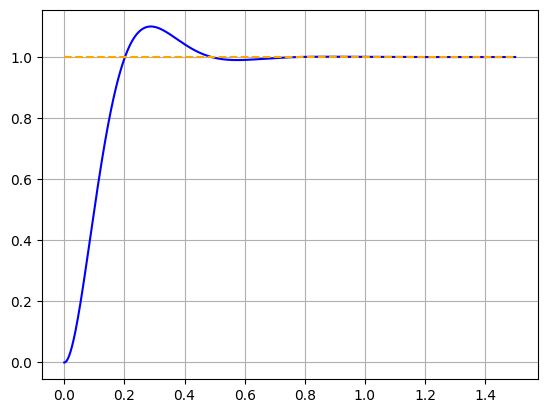

In [5]:
time, response = ctl.step_response(C, T=T)
plt.plot(time, response, color='blue')
plt.plot(time, np.ones(time.shape[0]), '--', color='orange')
plt.grid()

In [6]:
poles = ctl.poles(C)
poles
print(poles)

[-8.+10.91501083j -8.-10.91501083j]


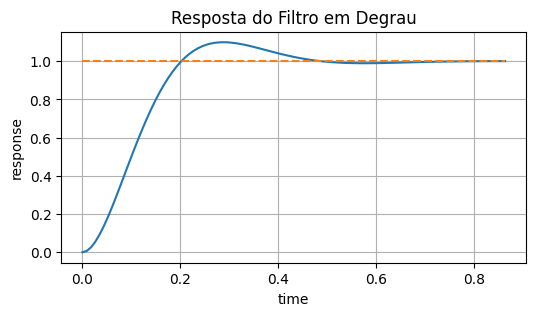

In [7]:
time, response = ctl.step_response(C)

plt.figure(figsize=(6, 3))
plt.plot(time, response)
plt.plot(time, [1 for i in time], '--')
plt.title('Resposta do Filtro em Degrau')
plt.xlabel('time')
plt.ylabel('response')
plt.grid()
plt.show()

#### TESTE GRÁFICO
- O gráfico abaixo mostra que quando a frequência se aproxima da frequência $\omega_{desired}$, ocorre a atenuação

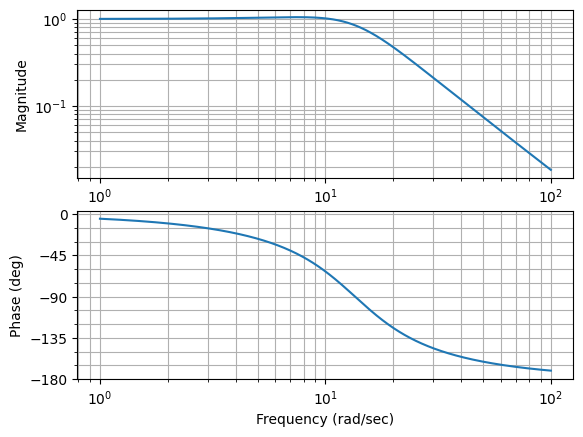

In [8]:
mag, fase, omega = ctl.bode(C, plot=True)

#### TESTE NUMÉRICO
- Vamos através dos vetores de magnitude e fase ver qual é a frequência onde ocorre a atenuação, obtendo a linha da tabela com a menor diferença entre o $\omega_{desired}$ que encontramos, e o $\omega$ da tabela. Vemos que nessa linha, a magnitude foi atenuada para um valor bem baixo
- A magnitude no ponto de frequência de corte deve ser igual a $\frac{1}{\sqrt{2}} = 0.707$ para a devida atenuação, vamos ver se isso realmente ocorre em $|C|_{s \to j\omega_c}$

In [9]:
f_c = 0.1
w_c = 2*np.pi*f_c

f_c, w_c

(0.1, 0.6283185307179586)

In [10]:
1/np.sqrt(2)

0.7071067811865475

In [11]:
mag = sympyFunction(C).subs(s, sp.I*w_c)
mag = sp.N(sp.Abs(mag))
float(mag)

1.0006473156238165